# K Nearest Neighbors Algorithm


####  KNN is a non-parametric, lazy learning algorithm. Its purpose is to use a database in which the data points are separated into several classes to predict the classification of a new sample point. ... KNN is also a lazy algorithm (as opposed to an eager algorithm).


#### KNN Algorithm is based on feature similarity: How closely out-of-sample features resemble our training set determines how we classify a given data point.

#### KNN can be used for classification — the output is a class membership (predicts a class — a discrete value). An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors. It can also be used for regression — output is the value for the object (predicts continuous values). This value is the average (or median) of the values of its k nearest neighbors.


##### for more [click here](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)


# KNN for Classification
When KNN is used for classification, the output can be calculated as the class with the highest frequency from the K-most similar instances. Each instance in essence votes for their class and the class with the most votes is taken as the prediction.

Class probabilities can be calculated as the normalized frequency of samples that belong to each class in the set of K most similar instances for a new data instance. For example, in a binary classification problem (class is 0 or 1):

## p(class=0) = count(class=0) / (count(class=0)+count(class=1))

If you are using K and you have an even number of classes (e.g. 2) it is a good idea to choose a K value with an odd number to avoid a tie. And the inverse, use an even number for K when you have an odd number of classes.

Ties can be broken consistently by expanding K by 1 and looking at the class of the next most similar instance in the training dataset.

## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Get the Data

Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)


to dwonload the dataset [click here](https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt)

In [8]:
col_names=['var_wavlet','skew_wavlet','kurt_wavlet','entropyofimage','class']
df = pd.read_csv("bankNotes.csv",header=None, names=col_names)

In [9]:
df.head()

,var_wavlet,skew_wavlet,kurt_wavlet,entropyofimage,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(df.drop('class',axis=1))

StandardScaler()

In [13]:
scaled_features = scaler.transform(df.drop('class',axis=1))

In [14]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,var_wavlet,skew_wavlet,kurt_wavlet,entropyofimage
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [15]:
#split the dataset in features and target variable
feature_cols=['var_wavlet','skew_wavlet','kurt_wavlet','entropyofimage']
X=df[feature_cols]
y=df['class']

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['class'],test_size=0.25)

## Using KNN

we are trying to come up with a model to predict whether someone will fall in CLASS or not. We'll start with k=1.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
pred = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(confusion_matrix(y_test,pred))

[[177   1]
 [  0 165]]


In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       178
           1       0.99      1.00      1.00       165

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343



## Choosing a K Value
We use elbow method to find optimal K.

In [25]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

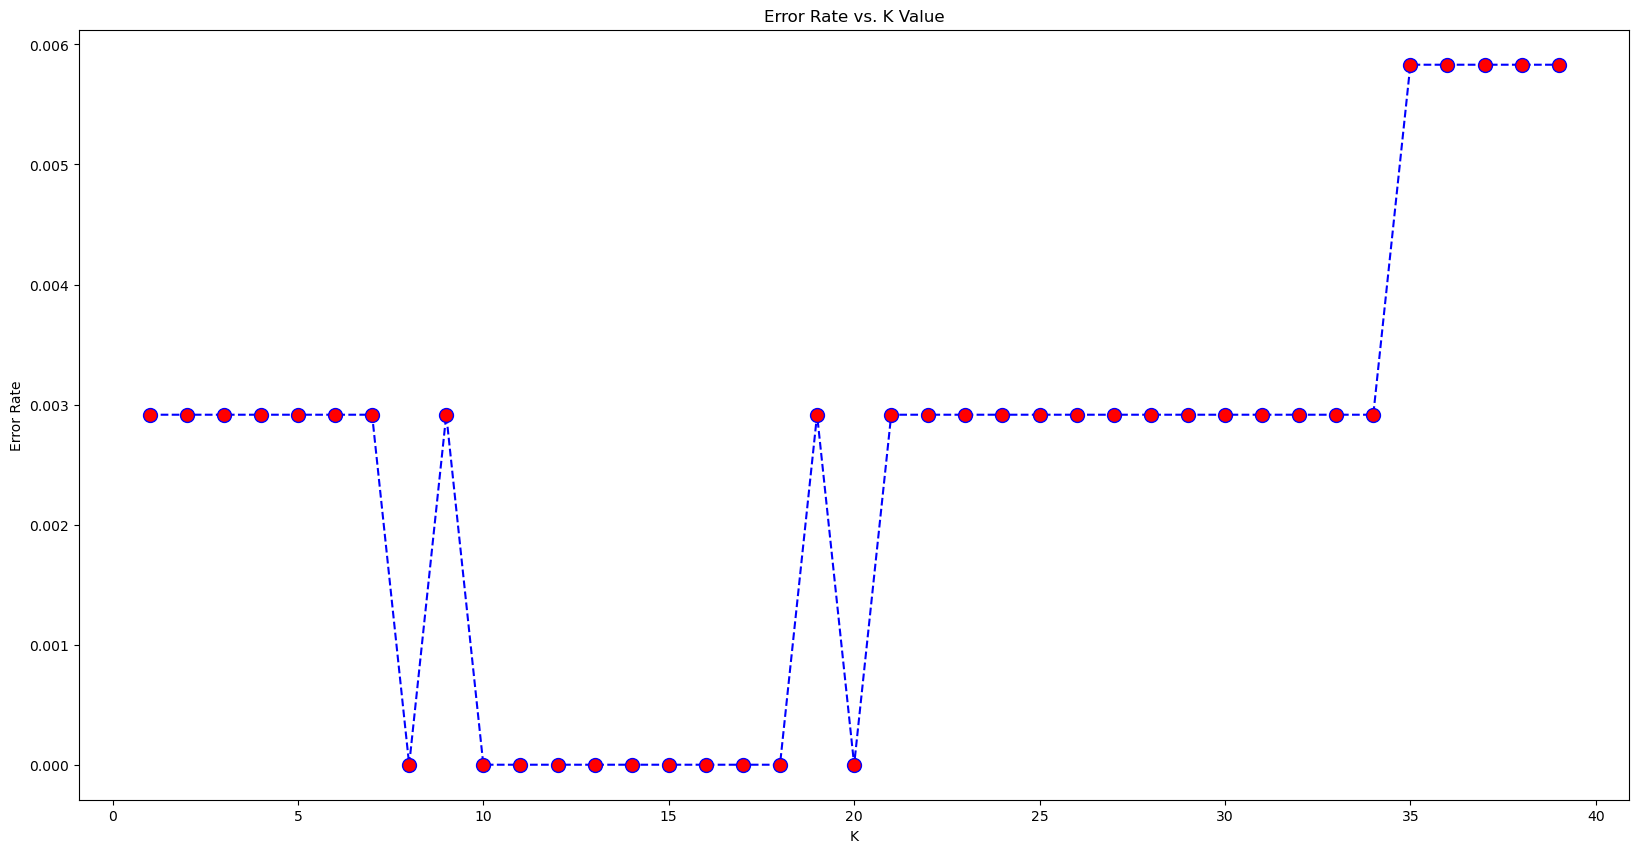

In [26]:
plt.figure(figsize=(20,10))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after a certain number of neighbors the error rate just tends to increases/decreases based on the params. Let's retrain the model with that and check the classification report!

In [27]:
#Trying with 1 neighbor
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[177   1]
 [  0 165]]


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       178
           1       0.99      1.00      1.00       165

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343



In [28]:
#Trying with 31 neighbor
knn = KNeighborsClassifier(n_neighbors=31)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=31')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=31


[[177   1]
 [  0 165]]


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       178
           1       0.99      1.00      1.00       165

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343



### We can see decrease in acuracy when we select the neighbors that have large error rates. 

Because the entire training dataset is stored, you may want to think carefully about the consistency of your training data. It might be a good idea to curate it, update it often as new data becomes available and remove erroneous and outlier data.
